Helpful Page: https://www.sdss.org/dr12/algorithms/magnitudes/

# Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Load Data

In [2]:
train = pd.read_csv('../dataset/train.csv', index_col = 0)
test = pd.read_csv('../dataset/test.csv', index_col = 0)
sample_submission = pd.read_csv('../dataset/sample_submission.csv', index_col = 0)

# Define Function

In [3]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values

    return summary

# Check Dataset
제공된 데이터 셋의 피쳐에 대한 설명은 다음과 같다.

- ID: Unique ID
- type: 천체의 분류
- psfMag(Point Spread Function Magnitudes): 먼 천제를 한 점으로 가정하여 측정한 빛의 밝기.
- fiberMag(Fiber Magnitudes): 광섬유를 통과하는 빛의 밝기. 3인치 지름의 광섬유를 사용하여 광스펙트럼을 측정.
- petroMag(Petrosian Magnitudes): 전체의 위치와 거리에 상관없이 빛의 밝기를 비교하기 위한 수치. 은하처럼 뚜렷한 표변이 없는 천체에서는 빛의 밝기를 측정하기 어렵다.
- modelMag(Model Magnitudes): 천체 중심으로부터 특정 거리의 밝기
- fiberID: 관측에 사용된 광섬유의 구분자

## Shape

In [4]:
print("Train Data Shape: {}".format(train.shape))
train.head()

Train Data Shape: (199991, 22)


,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


## Check Missing & Unique Value

In [5]:
resumetable(train)

Dataset Shape: (199991, 22)


,Name,dtypes,Missing,Uniques
0,type,object,0,19
1,fiberID,int64,0,1000
2,psfMag_u,float64,0,199991
3,psfMag_g,float64,0,199991
4,psfMag_r,float64,0,199991
5,psfMag_i,float64,0,199991
6,psfMag_z,float64,0,199991
7,fiberMag_u,float64,0,199991
8,fiberMag_g,float64,0,199991
9,fiberMag_r,float64,0,199991


fiberID(관측에 사용된 광섬유의 구분자)의 고유값 개수가 1,000개라는 것에 주목할 필요가 있다.

## Summary Statistics

In [6]:
train.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,...,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,...,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,...,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,...,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,...,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,...,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,...,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,...,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


# Explanatory Data Analysis

## Lable(type)

In [119]:
print("Num of Label Type: {}({})".format(train['type'].unique(), train['type'].nunique()))

Num of Label Type: ['QSO' 'STAR_RED_DWARF' 'SERENDIPITY_BLUE' 'STAR_BHB' 'STAR_CATY_VAR'
 'SERENDIPITY_DISTANT' 'GALAXY' 'SPECTROPHOTO_STD' 'REDDEN_STD' 'ROSAT_D'
 'STAR_WHITE_DWARF' 'SERENDIPITY_RED' 'STAR_CARBON' 'SERENDIPITY_FIRST'
 'STAR_BROWN_DWARF' 'STAR_SUB_DWARF' 'SKY' 'SERENDIPITY_MANUAL' 'STAR_PN'](19)


### QSO(Quasar)

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Artist%27s_rendering_ULAS_J1120%2B0641.jpg/450px-Artist%27s_rendering_ULAS_J1120%2B0641.jpg>

'준항성체'라고 불리우며, 블랙홀이 주변 물질을 집어삼키는 에너지에 의해 형성되는 거대 발광체이다.

중심에는 태양의 질량 10억 배나 되는 매우 무거운 블랙홀이 자리를 잡고 있고 그 주위에는 원반이 둘러싸고 있다. 원반의 물질이 회전하며 블랙홀로 떨어지며 물질의 중력 에너지가 빛 에너지로 바뀌변서 거대한 양의 빛이 발생한다.

지금까지 우주에서 발견된 천체들 중 가장 밝고, 강력하며, 활동적인 천체이다. 따라서 지구에서 관측할 수 있는 가장 먼 거리에 있는 천체로, 강한 에너지를 방출하는 <b>활동은하</b>이다. 

매우 큰 <b>적색편이</b>값을 갖는다는 특징을 보인다.

In [52]:
train_qso = train.loc[train['type'] == 'QSO']
print("Num of Quasar Observation : {}".format(train_qso.shape[0]))
print("Pct of Quasar Observation : {}%".format(round(train_qso.shape[0] / train.shape[0] * 100,2)))

Num of Quasar Observation : 49680
Pct of Quasar Observation : 24.84%


In [114]:
def VisFeature(data, method = 'hist'):
    data = data.drop(columns = 'type')
    
    if method == 'hist':
        
        f = plt.figure(figsize = (30,30))
        
        for i, col in enumerate(data.columns):
            f.add_subplot(6,4,i+1)
            sns.distplot(data[col])
            plt.title(col, fontsize = 14)
            plt.xlabel(' ')
            plt.ylabel('Density', fontsize = 12)

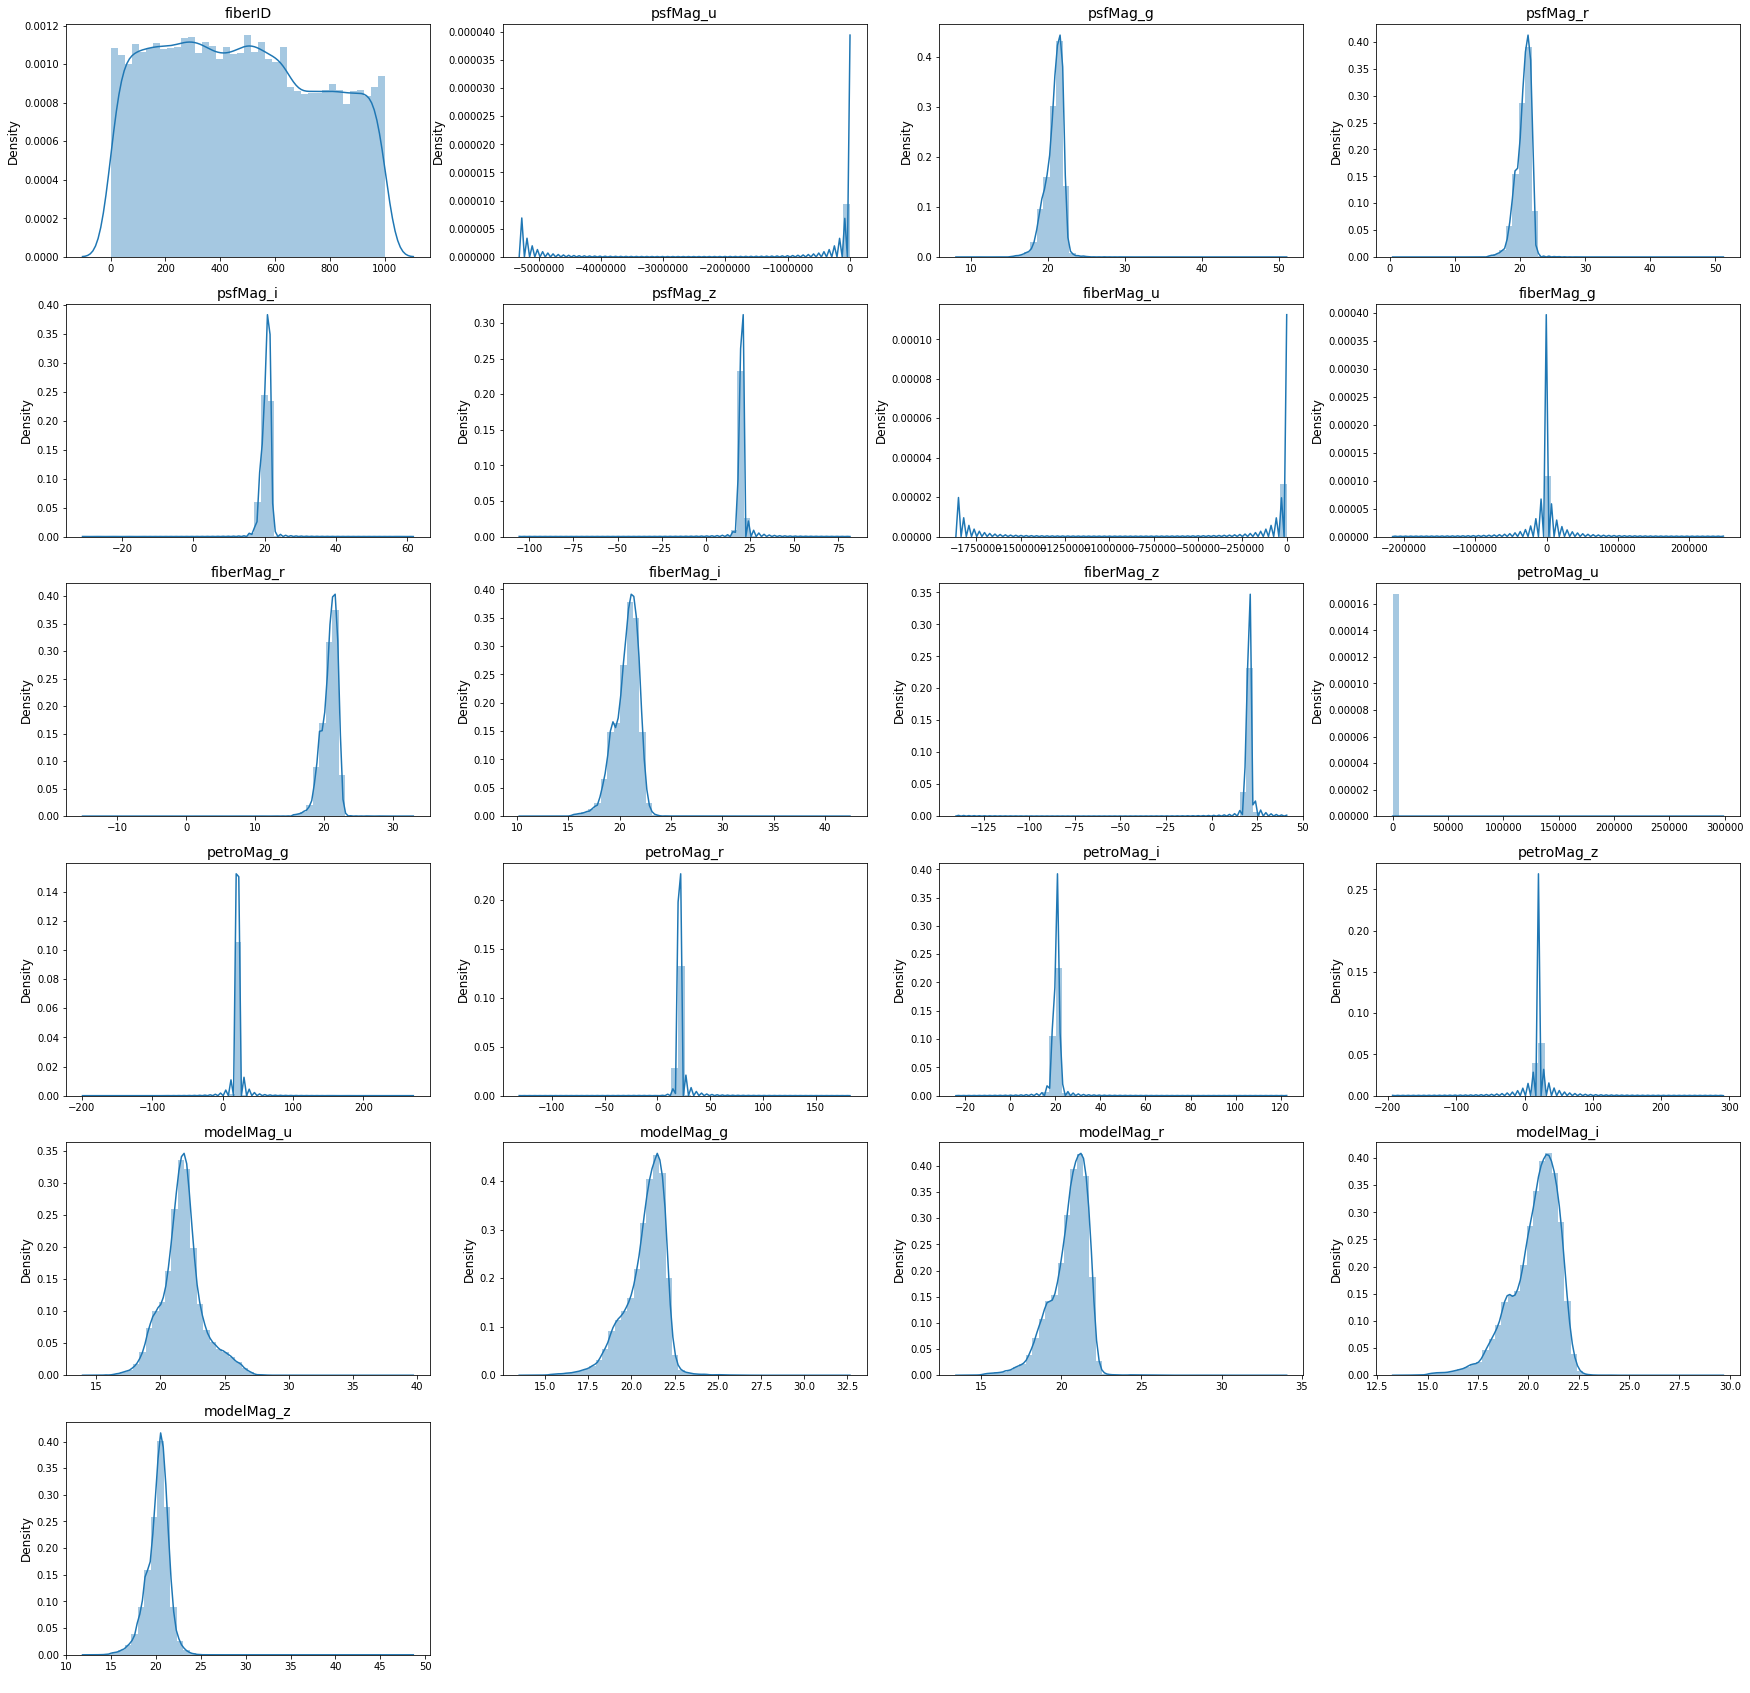

In [115]:
VisFeature(train_qso)